# Class 2

## Import Package

In [87]:
from sklearn.datasets import fetch_openml
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Initial exploration

#### Load the dataset

In [58]:
data = fetch_openml(data_id=1590, as_frame=True) # https://openml.org/search?type=data&status=active&id=1590

data

{'data':        age     workclass  fnlwgt     education  education-num  \
 0       25       Private  226802          11th              7   
 1       38       Private   89814       HS-grad              9   
 2       28     Local-gov  336951    Assoc-acdm             12   
 3       44       Private  160323  Some-college             10   
 4       18           NaN  103497  Some-college             10   
 ...    ...           ...     ...           ...            ...   
 48837   27       Private  257302    Assoc-acdm             12   
 48838   40       Private  154374       HS-grad              9   
 48839   58       Private  151910       HS-grad              9   
 48840   22       Private  201490       HS-grad              9   
 48841   52  Self-emp-inc  287927       HS-grad              9   
 
            marital-status         occupation relationship   race     sex  \
 0           Never-married  Machine-op-inspct    Own-child  Black    Male   
 1      Married-civ-spouse    Farming-fishin

#### Extract input features and target

In [59]:
X = data.data
y = data.target

#### understand the data

In [60]:
X.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States


In [61]:
X.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [62]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             48842 non-null  int64   
 1   workclass       46043 non-null  category
 2   fnlwgt          48842 non-null  int64   
 3   education       48842 non-null  category
 4   education-num   48842 non-null  int64   
 5   marital-status  48842 non-null  category
 6   occupation      46033 non-null  category
 7   relationship    48842 non-null  category
 8   race            48842 non-null  category
 9   sex             48842 non-null  category
 10  capital-gain    48842 non-null  int64   
 11  capital-loss    48842 non-null  int64   
 12  hours-per-week  48842 non-null  int64   
 13  native-country  47985 non-null  category
dtypes: category(8), int64(6)
memory usage: 2.6 MB


In [63]:
y.head()

0    <=50K
1    <=50K
2     >50K
3     >50K
4    <=50K
Name: class, dtype: category
Categories (2, object): ['<=50K', '>50K']

In [64]:
y.describe()

count     48842
unique        2
top       <=50K
freq      37155
Name: class, dtype: object

In [65]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             48842 non-null  int64   
 1   workclass       46043 non-null  category
 2   fnlwgt          48842 non-null  int64   
 3   education       48842 non-null  category
 4   education-num   48842 non-null  int64   
 5   marital-status  48842 non-null  category
 6   occupation      46033 non-null  category
 7   relationship    48842 non-null  category
 8   race            48842 non-null  category
 9   sex             48842 non-null  category
 10  capital-gain    48842 non-null  int64   
 11  capital-loss    48842 non-null  int64   
 12  hours-per-week  48842 non-null  int64   
 13  native-country  47985 non-null  category
dtypes: category(8), int64(6)
memory usage: 2.6 MB


In [66]:
# Check for missing values in the dataset
missing_values = X.isnull().sum()
print("Missing values per column:\n", missing_values)

# Print dataset size and target distribution
print("Dataset size:", X.shape)
print("Target distribution:\n", y.value_counts())


Missing values per column:
 age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
dtype: int64
Dataset size: (48842, 14)
Target distribution:
 class
<=50K    37155
>50K     11687
Name: count, dtype: int64


#### Cleaning data

In [67]:
# Separate numeric and categorical columns
numeric_columns = X.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = [col for col in X.columns if col not in numeric_columns]

# Impute numeric columns with the mean
numeric_imputer = SimpleImputer(strategy='mean')
X_numeric = pd.DataFrame(numeric_imputer.fit_transform(X[numeric_columns]), columns=numeric_columns)

# Impute categorical columns with the most frequent value
categorical_imputer = SimpleImputer(strategy='most_frequent')
X_categorical = pd.DataFrame(categorical_imputer.fit_transform(X[categorical_columns]), columns=categorical_columns)

# Combine the two datasets back together
X_imputed = pd.concat([X_numeric, X_categorical], axis=1)

In [68]:
X_imputed.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,25.0,226802.0,7.0,0.0,0.0,40.0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States
1,38.0,89814.0,9.0,0.0,0.0,50.0,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States
2,28.0,336951.0,12.0,0.0,0.0,40.0,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States
3,44.0,160323.0,10.0,7688.0,0.0,40.0,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States
4,18.0,103497.0,10.0,0.0,0.0,30.0,Private,Some-college,Never-married,Prof-specialty,Own-child,White,Female,United-States


In [69]:
X_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             48842 non-null  float64
 1   fnlwgt          48842 non-null  float64
 2   education-num   48842 non-null  float64
 3   capital-gain    48842 non-null  float64
 4   capital-loss    48842 non-null  float64
 5   hours-per-week  48842 non-null  float64
 6   workclass       48842 non-null  object 
 7   education       48842 non-null  object 
 8   marital-status  48842 non-null  object 
 9   occupation      48842 non-null  object 
 10  relationship    48842 non-null  object 
 11  race            48842 non-null  object 
 12  sex             48842 non-null  object 
 13  native-country  48842 non-null  object 
dtypes: float64(6), object(8)
memory usage: 5.2+ MB


### Step 2: split the data into train and test

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)


In [71]:
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (39073, 14)
Testing data shape: (9769, 14)


In [72]:
X_train.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country
37193,42.0,145175.0,10.0,0.0,0.0,40.0,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States
31093,52.0,175029.0,6.0,0.0,0.0,35.0,Self-emp-not-inc,10th,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States
33814,34.0,172664.0,9.0,0.0,0.0,40.0,Local-gov,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States
14500,28.0,125791.0,9.0,0.0,0.0,40.0,Private,HS-grad,Never-married,Adm-clerical,Not-in-family,White,Female,United-States
23399,46.0,28419.0,11.0,0.0,0.0,50.0,Private,Assoc-voc,Never-married,Transport-moving,Not-in-family,White,Male,United-States


In [73]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39073 entries, 37193 to 15795
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             39073 non-null  float64
 1   fnlwgt          39073 non-null  float64
 2   education-num   39073 non-null  float64
 3   capital-gain    39073 non-null  float64
 4   capital-loss    39073 non-null  float64
 5   hours-per-week  39073 non-null  float64
 6   workclass       39073 non-null  object 
 7   education       39073 non-null  object 
 8   marital-status  39073 non-null  object 
 9   occupation      39073 non-null  object 
 10  relationship    39073 non-null  object 
 11  race            39073 non-null  object 
 12  sex             39073 non-null  object 
 13  native-country  39073 non-null  object 
dtypes: float64(6), object(8)
memory usage: 4.5+ MB


### Step 3: Select numerical columns

In [74]:
# Drop non-numerical features
X_train_num = X_train.select_dtypes(include=['int64', 'float64'])
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])

print("Numerical features in training data:", X_train_num.columns)
print(X_train_num.dtypes)


Numerical features in training data: Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')
age               float64
fnlwgt            float64
education-num     float64
capital-gain      float64
capital-loss      float64
hours-per-week    float64
dtype: object


## Decision Trees

### Step 4: Train a Decision Tree

In [75]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_num, y_train)

DecisionTreeClassifier(random_state=42)

#### Evaluate the model

In [76]:
y_train_pred = clf.predict(X_train_num)
y_test_pred = clf.predict(X_test_num)

print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))
print("Tree depth:", clf.get_depth())
print("Number of leaves:", clf.get_n_leaves())

Training Accuracy: 0.9986691577304021
Testing Accuracy: 0.7714197973180469
Tree depth: 52
Number of leaves: 7857


### Step 5 & 6: limit depth

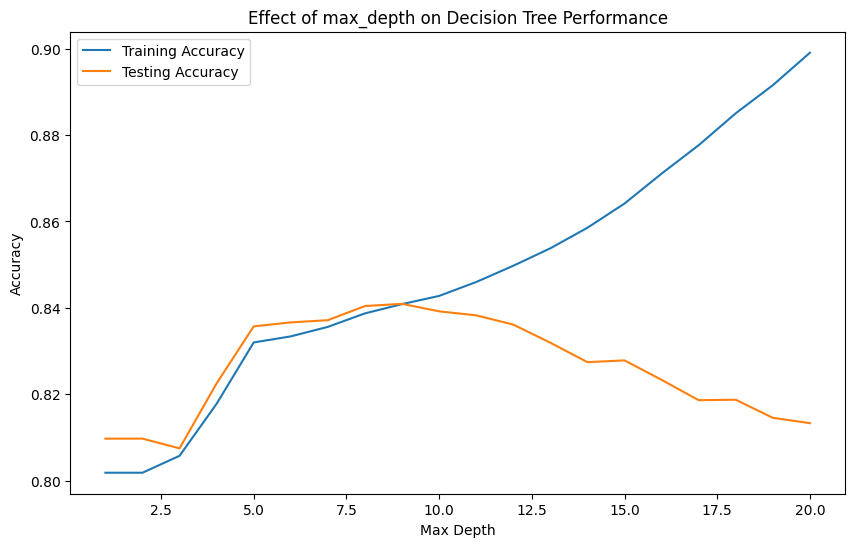

In [77]:
# Test different values for max_depth
depths = range(1, 21)  # Test depths from 1 to 20
train_accuracies = []
test_accuracies = []

for depth in depths:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train_num, y_train)

    # Evaluate on training and testing data
    train_accuracies.append(accuracy_score(y_train, clf.predict(X_train_num)))
    test_accuracies.append(accuracy_score(y_test, clf.predict(X_test_num)))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(depths, train_accuracies, label='Training Accuracy')
plt.plot(depths, test_accuracies, label='Testing Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Effect of max_depth on Decision Tree Performance')
plt.legend()
plt.show()

### Step 7: 3-fold training and validation score

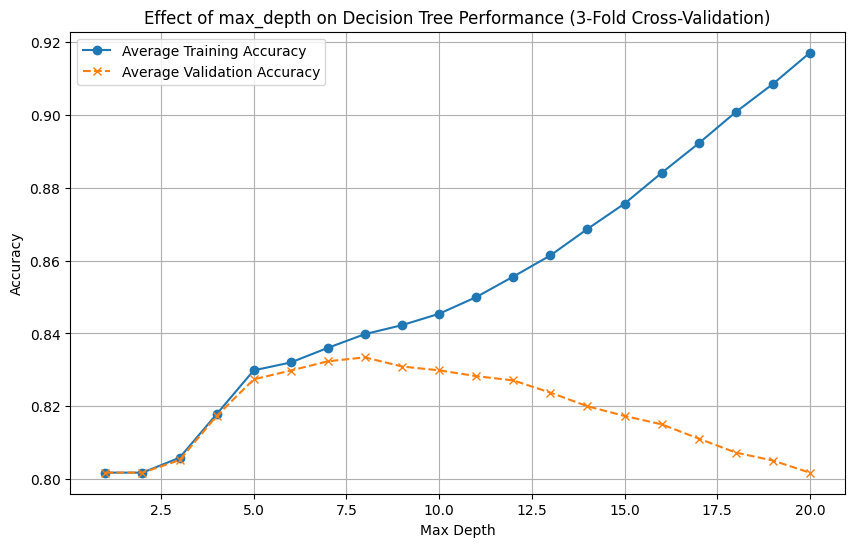

In [78]:
train_scores = []
val_scores = []

# Loop through depths and perform cross-validation
for depth in depths:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    scores = cross_validate(clf, X_train_num, y_train, cv=3, return_train_score=True)
    train_scores.append(np.mean(scores['train_score']))  # Average training score
    val_scores.append(np.mean(scores['test_score']))    # Average validation score

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(depths, train_scores, label='Average Training Accuracy', marker='o')
plt.plot(depths, val_scores, label='Average Validation Accuracy', linestyle='--', marker='x')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Effect of max_depth on Decision Tree Performance (3-Fold Cross-Validation)')
plt.legend()
plt.grid()
plt.show()

### Step 8: Hyperparameter optimization using GridSearchCV

**Note:** Keep each parameter to max 3-4 choices

Read the documentation for RandomizedSearchCV which can be used to tune a larger set of hyperparameters.

In [79]:
# Define the parameter grid
param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10]
}

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Set up GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=3, scoring='accuracy', return_train_score=True)

# Perform the search on X_train_num and y_train
grid_search.fit(X_train_num, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_params, best_score

({'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2},
 np.float64(0.8307527045890769))

## Encoding and Pipelines

### Step 9: Encoding categories

In [80]:
# Extract categorical columns from X_train
X_train_cat = X_train[categorical_columns]
X_test_cat = X_test[categorical_columns]

# Apply OneHotEncoding to categorical features
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)  # Updated argument
X_train_enc = encoder.fit_transform(X_train_cat)
X_test_enc = encoder.transform(X_test_cat)

# Train a Decision Tree on the encoded categorical data
clf_cat = DecisionTreeClassifier(random_state=42)
clf_cat.fit(X_train_enc, y_train)

# Evaluate the model on training and testing data
y_train_pred_cat = clf_cat.predict(X_train_enc)
y_test_pred_cat = clf_cat.predict(X_test_enc)

train_accuracy_cat = accuracy_score(y_train, y_train_pred_cat)
test_accuracy_cat = accuracy_score(y_test, y_test_pred_cat)

train_accuracy_cat, test_accuracy_cat

(0.8602615616922171, 0.8237281195618794)

### Steo 10: Checking the missing values

#### Check for Missing Values

In [81]:
# Check for missing values in categorical columns
missing_values_cat = X_train_cat.isnull().sum()

# Display missing values
print("Missing values in categorical columns:\n", missing_values_cat)


Missing values in categorical columns:
 workclass         0
education         0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
native-country    0
dtype: int64


#### Use get_feature_names_out() to Inspect Encoding

In [82]:
# Check the feature names after encoding
feature_names = encoder.get_feature_names_out(categorical_columns)

# Display the feature names
print("Encoded feature names:\n", feature_names)


Encoded feature names:
 ['workclass_Federal-gov' 'workclass_Local-gov' 'workclass_Never-worked'
 'workclass_Private' 'workclass_Self-emp-inc' 'workclass_Self-emp-not-inc'
 'workclass_State-gov' 'workclass_Without-pay' 'education_10th'
 'education_11th' 'education_12th' 'education_1st-4th' 'education_5th-6th'
 'education_7th-8th' 'education_9th' 'education_Assoc-acdm'
 'education_Assoc-voc' 'education_Bachelors' 'education_Doctorate'
 'education_HS-grad' 'education_Masters' 'education_Preschool'
 'education_Prof-school' 'education_Some-college'
 'marital-status_Divorced' 'marital-status_Married-AF-spouse'
 'marital-status_Married-civ-spouse'
 'marital-status_Married-spouse-absent' 'marital-status_Never-married'
 'marital-status_Separated' 'marital-status_Widowed'
 'occupation_Adm-clerical' 'occupation_Armed-Forces'
 'occupation_Craft-repair' 'occupation_Exec-managerial'
 'occupation_Farming-fishing' 'occupation_Handlers-cleaners'
 'occupation_Machine-op-inspct' 'occupation_Other-service

In [83]:
# Re-encode the imputed categorical features
X_train_enc_imputed = encoder.fit_transform(X_train_cat)
X_test_enc_imputed = encoder.transform(X_test_cat)

In [84]:
# Train a Decision Tree on the encoded categorical data with imputed missing values
clf_cat_imputed = DecisionTreeClassifier(random_state=42)
clf_cat_imputed.fit(X_train_enc_imputed, y_train)

DecisionTreeClassifier(random_state=42)

In [85]:
# Evaluate the model on training and testing data
y_train_pred_cat_imputed = clf_cat_imputed.predict(X_train_enc_imputed)
y_test_pred_cat_imputed = clf_cat_imputed.predict(X_test_enc_imputed)

train_accuracy_cat_imputed = accuracy_score(y_train, y_train_pred_cat_imputed)
test_accuracy_cat_imputed = accuracy_score(y_test, y_test_pred_cat_imputed)

train_accuracy_cat_imputed, test_accuracy_cat_imputed

(0.8602615616922171, 0.8237281195618794)

In [89]:
# Create a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
        ]), categorical_columns),
        ('num', SimpleImputer(strategy='mean'), numeric_columns)
    ]
)

# Create the pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Train the pipeline
pipeline.fit(X_train, y_train)

# Evaluate the pipeline
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")


Training Accuracy: 0.999872034397154
Testing Accuracy: 0.8220902855972976
